In [1]:
import numpy as np, pandas as pd

# Vectorized String Operations 

One benifit of working with python accompanied with Pandas is that it eases the complexity of working with multiple and complicated string operations.

## Introduction to Pandas String Operations

We saw how use of numpy arrays ease the generalization of arithmatic operations onto elements of each array.

In [3]:
x=np.array([2,3,5,7,11,13])
x*2

array([ 4,  6, 10, 14, 22, 26])

This is called broadcasting of the operation, as studied in detail in the previous Numpy section. For handling similar broadcasting operations over strings Numpy doesn't come handy, which might requires more verbose default python commands 

In [5]:
data=['kali', 'Meeta', 'HARSH', 'mANUJ']
[s.capitalize() for s in data]

['Kali', 'Meeta', 'Harsh', 'Manuj']

This would have been sufficient in certain simiple cases, but in instances where there are NULL values in the list, this method would fail

In [6]:
data=['kali', 'Meeta', None ,'HARSH', 'mANUJ']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas' Vectorized String Operations handles multiple such problems that might originate at specific string operation instances using the `str` attribute of Pandas `Series` or the `Index` Object

In [8]:
names=pd.Series(data)
names

0     kali
1    Meeta
2     None
3    HARSH
4    mANUJ
dtype: object

In [9]:
names.str.capitalize()

0     Kali
1    Meeta
2     None
3    Harsh
4    Manuj
dtype: object

## Pandas String Methods

Given the basic knowledge of default python string operations, it is fairly intuitive to understand the string operations using Pandas, upon merely looking at all the methods that exist.

We'll use the list below to demonstrate the usage of these string operations.

In [11]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle', 'Terry Jones', 'Michael Palin'])


### Methods similar to default Python string methods

Here's a list of Pandas `str` methods that mirror Python string methods

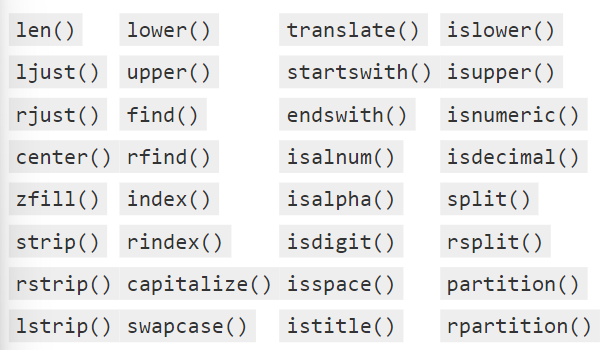

Notice that these might have different return values. Observe the output of the two string operations below

In [ ]:
Here's a l